In [1]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.preprocessing import MaxAbsScaler
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/benjaminlewis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/benjaminlewis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/benjaminlewis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/benjaminlewis/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
import pandas
trainData = pandas.read_csv("mediaeval-2015-trainingset.txt", sep="	")
testData = pandas.read_csv("mediaeval-2015-testset.txt", sep="	")

In [4]:
df_train = pandas.DataFrame(data = trainData)
df_test = pandas.DataFrame(data = testData)

In [5]:
print(df_train.label.where(df_train.label =='1').dropna())

Series([], Name: label, dtype: object)


In [6]:
df_train = df_train.dropna()

In [7]:
df_train.loc[(df_train.label == 'humor'),'label'] = 'fake'
df_test.loc[(df_test.label == 'humor'),'label'] = 'fake'
df_train=df_train.drop_duplicates(subset=['tweetText'])

In [5]:
df_train.head()

              tweetId                                          tweetText  \
0  263046056240115712  ¿Se acuerdan de la película: “El día después d...   
1  262995061304852481  @milenagimon: Miren a Sandy en NY!  Tremenda i...   
2  262979898002534400  Buena la foto del Huracán Sandy, me recuerda a...   
3  262996108400271360     Scary shit #hurricane #NY http://t.co/e4JLBUfH   
4  263018881839411200  My fave place in the world #nyc #hurricane #sa...   

      userId      imageId(s)        username                       timestamp  \
0   21226711  sandyA_fake_46         iAnnieM  Mon Oct 29 22:34:01 +0000 2012   
1  192378571  sandyA_fake_09  CarlosVerareal  Mon Oct 29 19:11:23 +0000 2012   
2  132303095  sandyA_fake_09     LucasPalape  Mon Oct 29 18:11:08 +0000 2012   
3  241995902  sandyA_fake_29     Haaaaarryyy  Mon Oct 29 19:15:33 +0000 2012   
4  250315890  sandyA_fake_15  princess__natt  Mon Oct 29 20:46:02 +0000 2012   

  label  
0  fake  
1  fake  
2  fake  
3  fake  
4  fake  


In [6]:
print(df_train['label'].value_counts())

fake     6742
real     4921
humor    2614
Name: label, dtype: int64


In [10]:
print(y_test.value_counts())

fake    2546
real    1209
Name: label, dtype: int64


In [13]:
print(y_train.value_counts())

fake    8597
real    3779
Name: label, dtype: int64


In [8]:
def process_tweet(tweet):
        #removing non standerd text
        tweet = re.sub(r'http\S+', 'http', tweet)
        tweet = re.sub(r'[^a-zA-Z0-9]+', ' ', tweet)

        
        #removing stopwords
        stopwords_set = set(stopwords.words())
        tweet = ' '.join([word for word in tweet.split() if word.lower() not in stopwords_set])

        # tokeninsation adn lemmatisation 
        lemmatizer = WordNetLemmatizer()
        tokens = nltk.word_tokenize(tweet)
        tweet = ' '.join([lemmatizer.lemmatize(token) for token in tokens])
        
        return tweet.lower()
          

In [9]:
def calcF1(pred,act):

    truePositives = sum((pred == 'fake') & (act == 'fake'))



    positives = sum(pred == 'fake')


    precision = truePositives / positives

    totalPositives = sum(act == 'fake')


    recall = truePositives / totalPositives

    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

In [10]:
df_train['pTweets']= df_train['tweetText'].apply(lambda text: process_tweet(text))
df_test['pTweets']= df_test['tweetText'].apply(lambda text: process_tweet(text))


In [11]:
df_train.head(10)

,tweetId,tweetText,userId,imageId(s),username,timestamp,label,pTweets
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake,acuerdan cula despu ana recuerda pasando hurac...
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake,milenagimon miren sandy ny tremenda imagen hur...
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake,buena foto hurac sandy recuerda cula independe...
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake,scary shit hurricane ny http
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,fave place world nyc hurricane sandy statueofl...
5,263364439582060545,42nd #time #square #NYC #subway #hurricane htt...,163674788,sandyA_fake_23,classycg,Tue Oct 30 19:39:10 +0000 2012,fake,42nd time square nyc subway hurricane http
6,262927032705490944,Just in time for #halloween a photo of #hurric...,246153081,sandyA_fake_14,j_unit87,Mon Oct 29 14:41:04 +0000 2012,fake,time halloween photo hurricane sandy frankenst...
7,263321078884077568,Crazy pic of #Hurricane #Sandy prayers go out ...,199565482,sandyA_fake_29,MrBlakMagik,Tue Oct 30 16:46:52 +0000 2012,fake,crazy hurricane sandy prayer family friend eas...
8,263111677485142017,#sandy #newyork #hurricane #statueofliberty #U...,78475739,sandyA_fake_15,safi37,Tue Oct 30 02:54:46 +0000 2012,fake,sandy newyork hurricane statueofliberty usa http
9,262977091983785985,#nyc #hurricane http://t.co/Gv3QxZlq,869777653,sandyA_fake_29,kingmichael03,Mon Oct 29 17:59:59 +0000 2012,fake,nyc hurricane http


In [12]:
X_train = df_train['pTweets']
X_test = df_test['pTweets']
y_train = df_train['label']
y_test= df_test['label']
vectorizer = TfidfVectorizer( max_df=0.3)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

#sgd 
lr = SGDClassifier(max_iter=2000,alpha=0.0001);
lr.fit(X_train_vec, y_train)
SGD_accuracy = lr.score(X_test_vec, y_test)
SGD_preds =lr.predict(X_test_vec)
SGD_F1 =  calcF1(SGD_preds,y_test)

#LR
lr = LogisticRegression(C=100, max_iter=1000)
lr.fit(X_train_vec, y_train)
LG_preds=lr.predict(X_test_vec)
LG_accuracy = lr.score(X_test_vec, y_test)
LG_F1 =  calcF1(LG_preds,y_test)

#SVM
clf = SVC(kernel='poly')
clf.fit(X_train_vec, y_train)
SVM_accuracy = clf.score(X_test_vec, y_test)
SVM_F1 = calcF1(clf.predict(X_test_vec),y_test)

#DT
dt = DecisionTreeClassifier()
dt.fit(X_train_vec, y_train)
DT_accuracy = dt.score(X_test_vec, y_test)
DT_F1 = calcF1(dt.predict(X_test_vec),y_test)





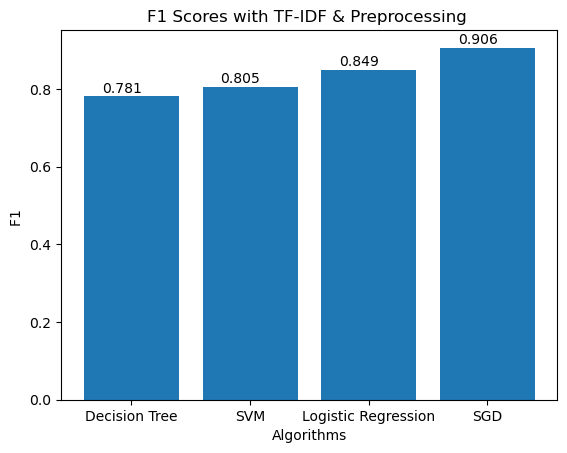

In [13]:


x_axis = ['Decision Tree', 'SVM', 'Logistic Regression', 'SGD']
y_axis = [DT_F1, SVM_F1, LG_F1, SGD_F1]

plt.bar(x_axis, y_axis)
plt.title('F1 Scores with TF-IDF & Preprocessing ')
plt.xlabel('Algorithms')
plt.ylabel('F1 ')
for i, v in enumerate(y_axis):
    plt.text(i-0.25, v+0.01, "{:.3f}".format(v))
plt.show()

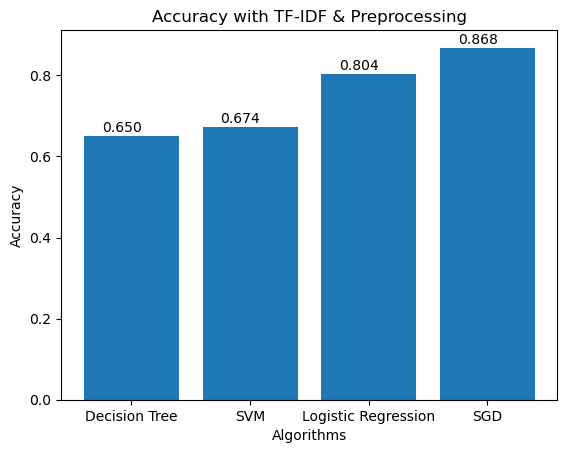

In [14]:
x_axis = ['Decision Tree', 'SVM', 'Logistic Regression', 'SGD']
y_axis = [DT_accuracy, SVM_accuracy, LG_accuracy, SGD_accuracy]

plt.bar(x_axis, y_axis)
plt.title('Accuracy with TF-IDF & Preprocessing')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
for i, v in enumerate(y_axis):
    plt.text(i-0.25, v+0.01, "{:.3f}".format(v))
plt.show()

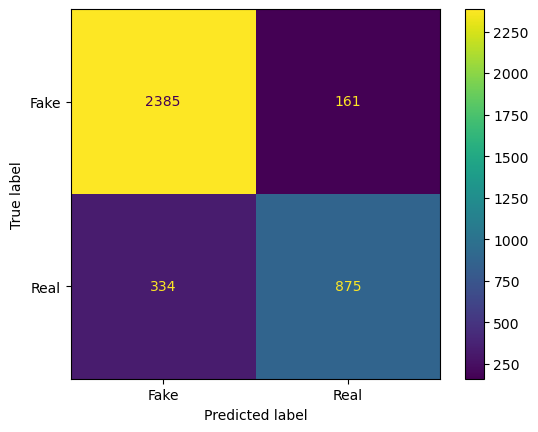

In [15]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, SGD_preds)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Fake","Real"])

cm_display.plot()
plt.show()

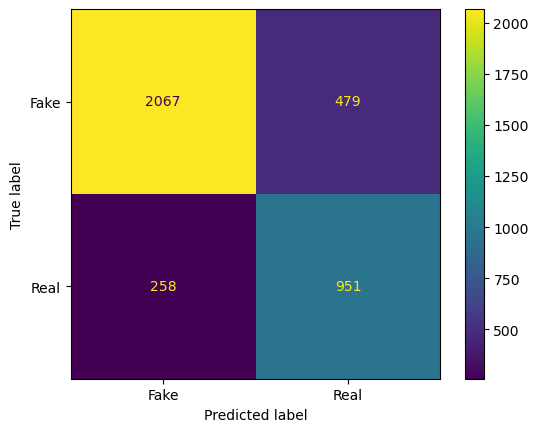

In [16]:
confusion_matrix = metrics.confusion_matrix(y_test, LG_preds)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Fake","Real"])

cm_display.plot()
plt.show()